In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['cell_images']


In [2]:
ls

__notebook_source__.ipynb


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
from keras import backend as K
from keras.layers import BatchNormalization
import numpy as np
import cv2
from keras.optimizers import SGD

Using TensorFlow backend.


In [ ]:
Visualizing the dataset

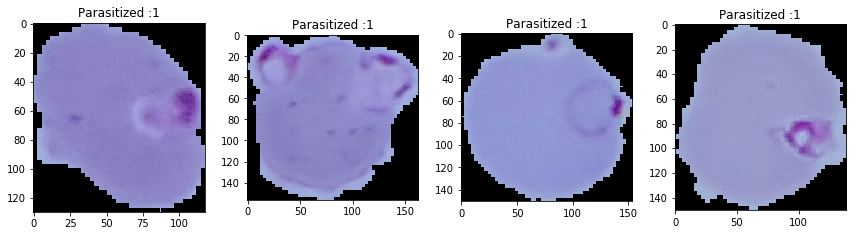

In [4]:
import matplotlib.pyplot as plt
parasitized = os.listdir('../input/cell_images/cell_images/Parasitized/')
uninfected = os.listdir('../input/cell_images/cell_images/Uninfected/')
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized[i])
    plt.imshow(img)
    plt.title('Parasitized :1')
    plt.tight_layout()
plt.show()

In [5]:
 b=cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized[0])

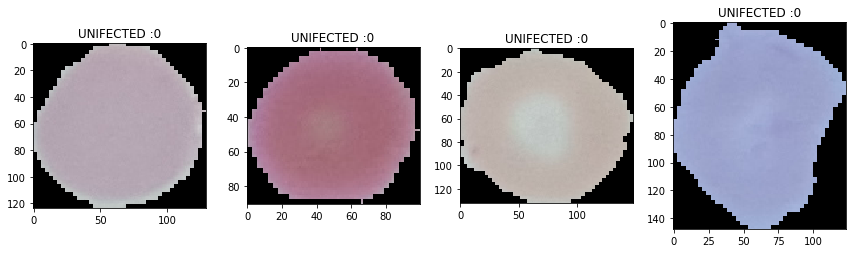

In [12]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected[i+1])
    plt.imshow(img)
    plt.title('UNIFECTED :0')
    plt.tight_layout()
plt.show()

In [7]:
#Preparing the Train and test data
Parasitized_count=0
Uninfected_count=0
for i in os.listdir("/kaggle/input/cell_images/cell_images/Parasitized/"):
    Parasitized_count=Parasitized_count+1
for i in os.listdir("/kaggle/input/cell_images/cell_images/Uninfected/"):
    Uninfected_count=Uninfected_count+1
print("Parasitized_count:",Parasitized_count)
print("Uninfected_count:",Uninfected_count)

Parasitized_count: 13780
Uninfected_count: 13780


In [8]:
data=[]
labels=[]
for img in parasitized:
    try:
        img_read=plt.imread('../input/cell_images/cell_images/Parasitized/' + "/" + img)
        img_resize=cv2.resize(img_read,(50,50))
        img_array=img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
for img in uninfected:
    try:
        img_read=plt.imread('../input/cell_images/cell_images/Uninfected' + "/" + img)
        img_resize=cv2.resize(img_read,(50,50))
        img_array=img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None
        

In [13]:
data[0].shape

(50, 50, 3)

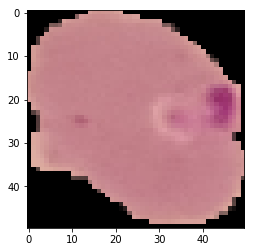

In [14]:
plt.imshow(data[0])
plt.show()

In [15]:
image_data=np.array(data)
labels=np.array(labels)

In [16]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.2, random_state=101)

In [18]:
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)

In [20]:
import Augmentor

ModuleNotFoundError: No module named 'Augmentor'

/opt/conda/lib/python3.6/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


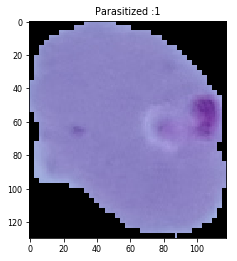

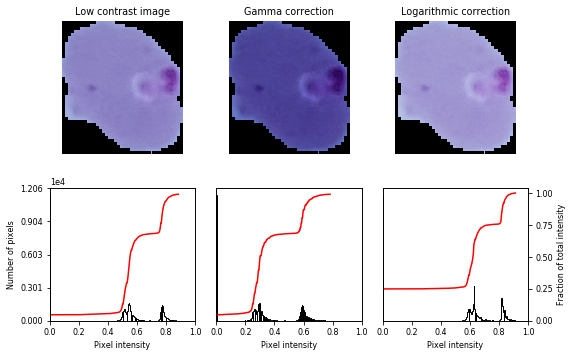

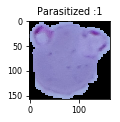

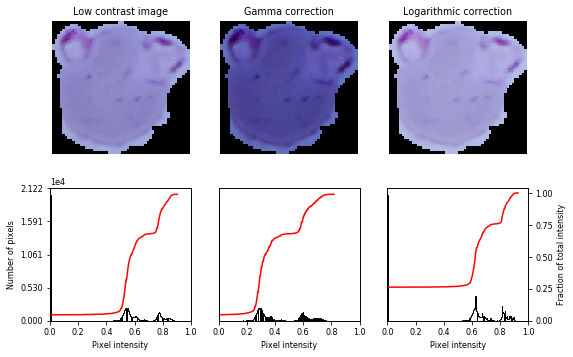

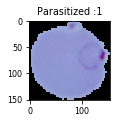

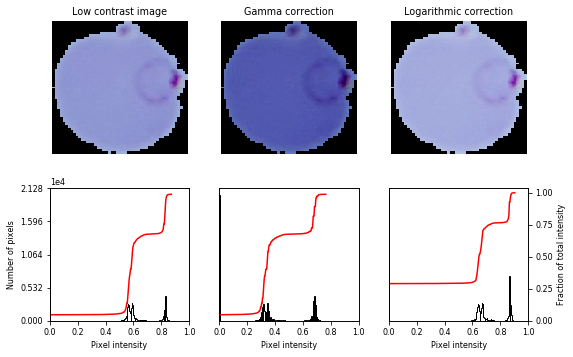

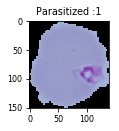

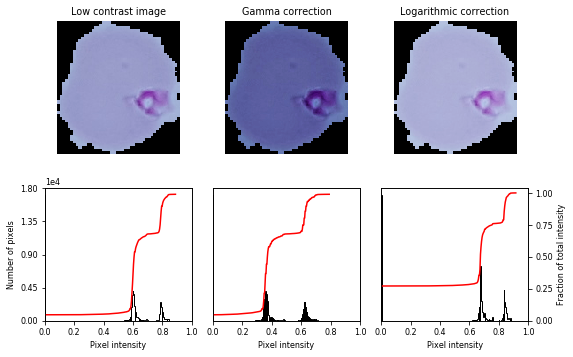

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
import matplotlib.pyplot as plt
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/')
uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/')
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parasitized :1')
    plt.tight_layout()


    # Gamma
    gamma_corrected = exposure.adjust_gamma(img, 2)

    # Logarithmic
    logarithmic_corrected = exposure.adjust_log(img, 1)

    # Display results
    fig = plt.figure(figsize=(8, 5))
    axes = np.zeros((2, 3), dtype=np.object)
    axes[0, 0] = plt.subplot(2, 3, 1)
    axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[1, 0] = plt.subplot(2, 3, 4)
    axes[1, 1] = plt.subplot(2, 3, 5)
    axes[1, 2] = plt.subplot(2, 3, 6)

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Low contrast image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')
    ax_hist.set_yticks(np.linspace(0, y_max, 5))

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
    ax_img.set_title('Gamma correction')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
    ax_img.set_title('Logarithmic correction')

    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

    # prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()

In [21]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'], loss="categorical_crossentropy")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
__________

In [25]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
22046/22046 [==============================] - 7s 310us/step - loss: 0.4506 - acc: 0.8106
Epoch 2/20
22046/22046 [==============================] - 5s 222us/step - loss: 0.1951 - acc: 0.9346
Epoch 3/20
22046/22046 [==============================] - 5s 224us/step - loss: 0.1709 - acc: 0.9407
Epoch 4/20
22046/22046 [==============================] - 5s 225us/step - loss: 0.1568 - acc: 0.9486
Epoch 5/20
22046/22046 [==============================] - 5s 222us/step - loss: 0.1507 - acc: 0.9496
Epoch 6/20
22046/22046 [==============================] - 5s 230us/step - loss: 0.1410 - acc: 0.9526
Epoch 7/20
22046/22046 [==============================] - 5s 245us/step - loss: 0.1324 - acc: 0.9545
Epoch 8/20
22046/22046 [==============================] - 5s 233us/step - loss: 0.1282 - acc: 0.9561
Epoch 9/20
22046/22046 [==============================] - 5s 222us/step - loss: 0.1227 - acc: 0.9591
Epoch 10/20
22046/22046 [==================

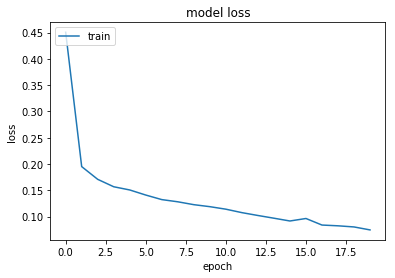

In [28]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.evaluate(X_test,y_test)

5512/5512 [==============================] - 1s 124us/step


[0.1581637610671893, 0.9584542815674891]

In [31]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

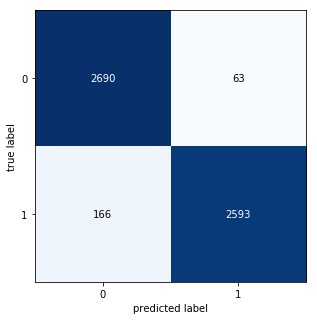

In [32]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [33]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(X_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(X_test, y_test, batch_size = 64, shuffle = False)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_test)

In [34]:
chanDim=-1
model_aug=Sequential()
model_aug.add(Conv2D(32,(3,3), activation='relu',input_shape=(50,50,3)))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Flatten())
model_aug.add(Dense(256,activation='relu'))
model_aug.add(Dense(128, activation="relu"))
model_aug.add(Dense(2, activation='softmax'))

In [53]:
_ih[-5:]

['display_activation(activations, 8, 8, 10)',
 'display_activation(activations, 8, 8, 11)',
 'display_activation(activations, 8, 8, 12)',
 'import matplotlib\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfrom skimage import data, img_as_float\nfrom skimage import exposure\n\nmatplotlib.rcParams[\'font.size\'] = 8\n\n\ndef plot_img_and_hist(image, axes, bins=256):\n    """Plot an image along with its histogram and cumulative histogram.\n\n    """\n    image = img_as_float(image)\n    ax_img, ax_hist = axes\n    ax_cdf = ax_hist.twinx()\n\n    # Display image\n    ax_img.imshow(image, cmap=plt.cm.gray)\n    ax_img.set_axis_off()\n\n    # Display histogram\n    ax_hist.hist(image.ravel(), bins=bins, histtype=\'step\', color=\'black\')\n    ax_hist.ticklabel_format(axis=\'y\', style=\'scientific\', scilimits=(0, 0))\n    ax_hist.set_xlabel(\'Pixel intensity\')\n    ax_hist.set_xlim(0, 1)\n    ax_hist.set_yticks([])\n\n    # Display cumulative distribution\n    img_cdf, bins = exp

In [35]:
from keras import optimizers
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [36]:
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(X_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 17s 49ms/step - loss: 0.4650 - acc: 0.7840
Epoch 2/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2930 - acc: 0.8855
Epoch 3/50
344/344 [==============================] - 17s 50ms/step - loss: 0.2612 - acc: 0.9037
Epoch 4/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2500 - acc: 0.9083
Epoch 5/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2403 - acc: 0.9116
Epoch 6/50
344/344 [==============================] - 16s 46ms/step - loss: 0.2346 - acc: 0.9144
Epoch 7/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2275 - acc: 0.9176
Epoch 8/50
344/344 [==============================] - 17s 50ms/step - loss: 0.2265 - acc: 0.9182
Epoch 9/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2193 - acc: 0.9195
Epoch 10/50
344/344 [==============================] - 16s 47ms/step - loss: 0.2210 - acc: 0.9180
Epoch 11/50
344/344 [========

In [ ]:
model_aug.evaluate_generator(val_generator,steps=5)

In [38]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,50,50,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1
        

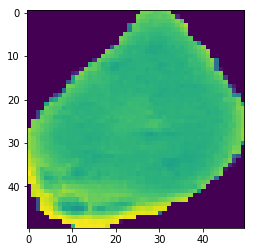

In [39]:
plt.imshow(X_train[10][:,:,0]);

In [ ]:
Output after layer 1

IndexError: index 32 is out of bounds for axis 3 with size 32

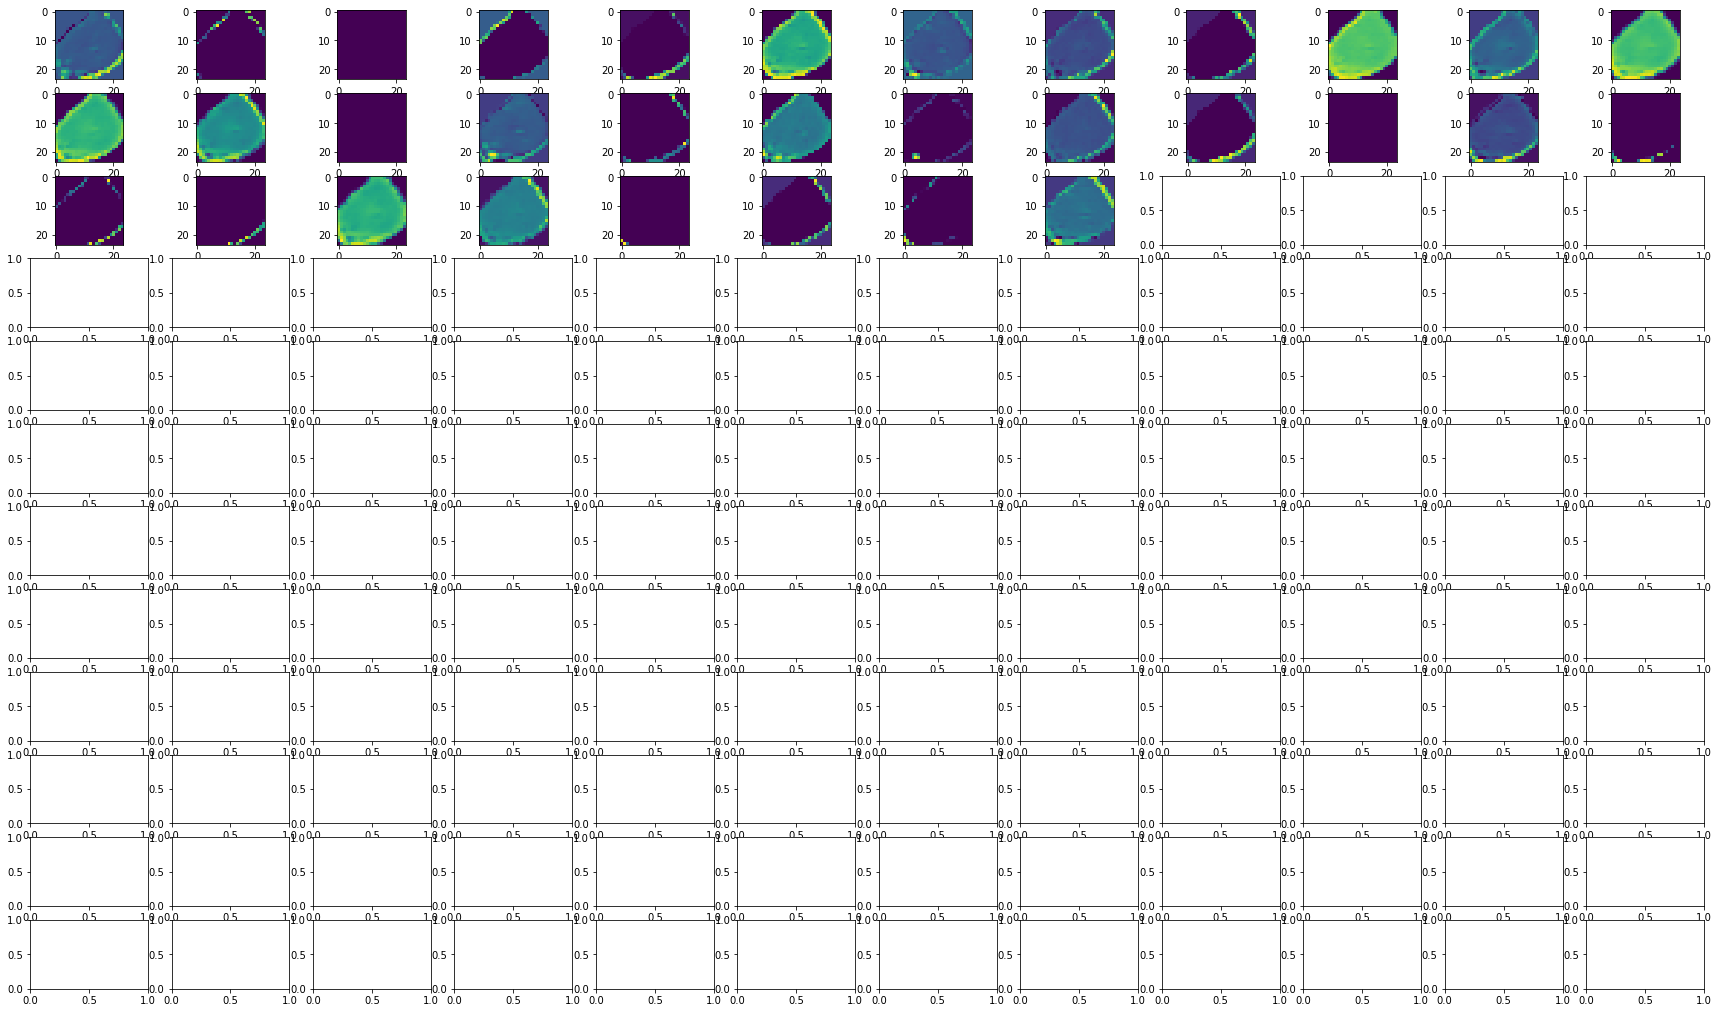

In [40]:
display_activation(activations, 12, 12, 1)

In [ ]:
Output after layer 2

IndexError: index 32 is out of bounds for axis 3 with size 32

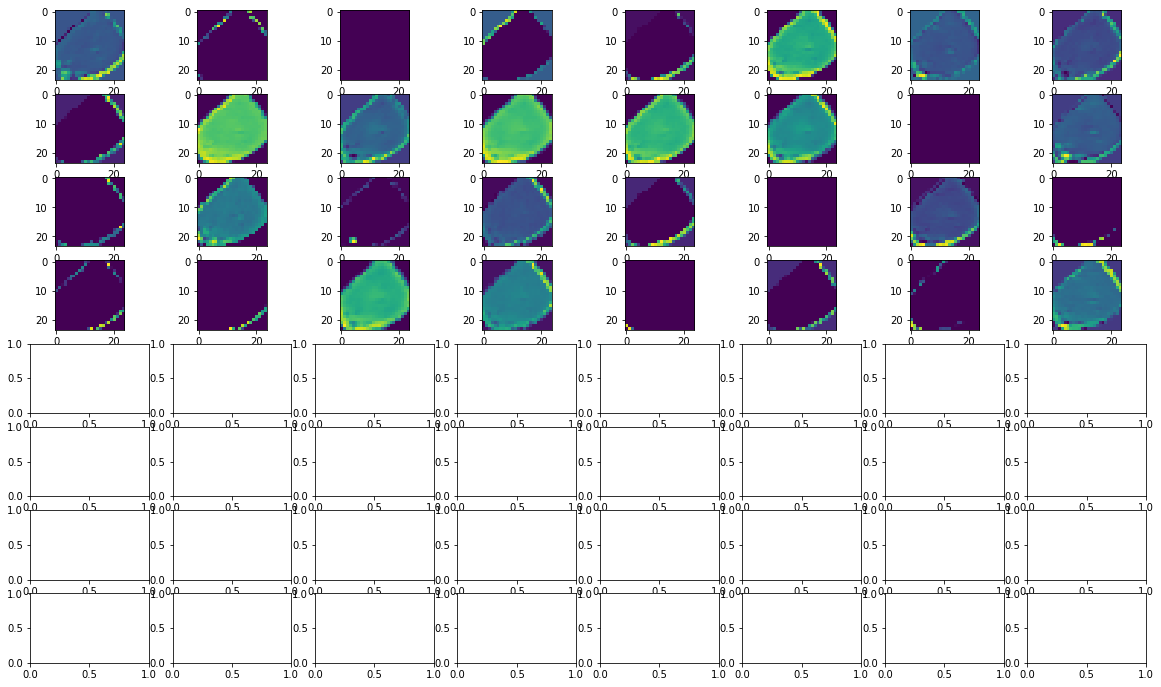

In [41]:
display_activation(activations, 8, 8, 2)

In [ ]:
Output after layer 3

IndexError: index 32 is out of bounds for axis 3 with size 32

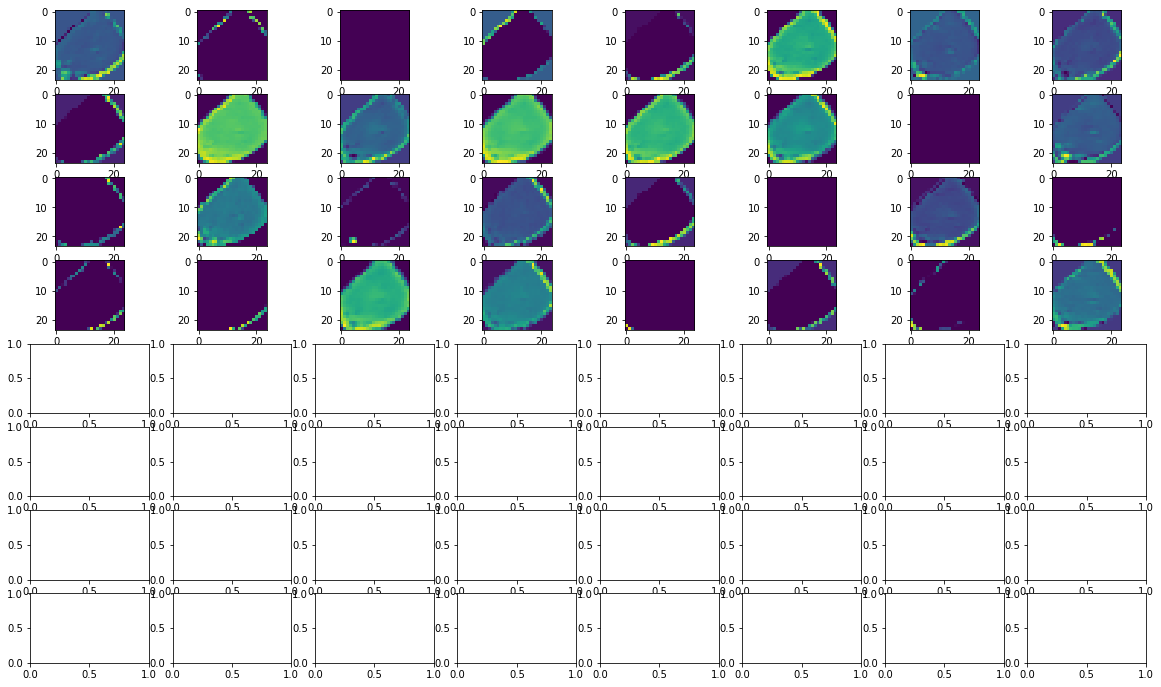

In [42]:
display_activation(activations, 8, 8, 3)

In [ ]:
Output after layer 4

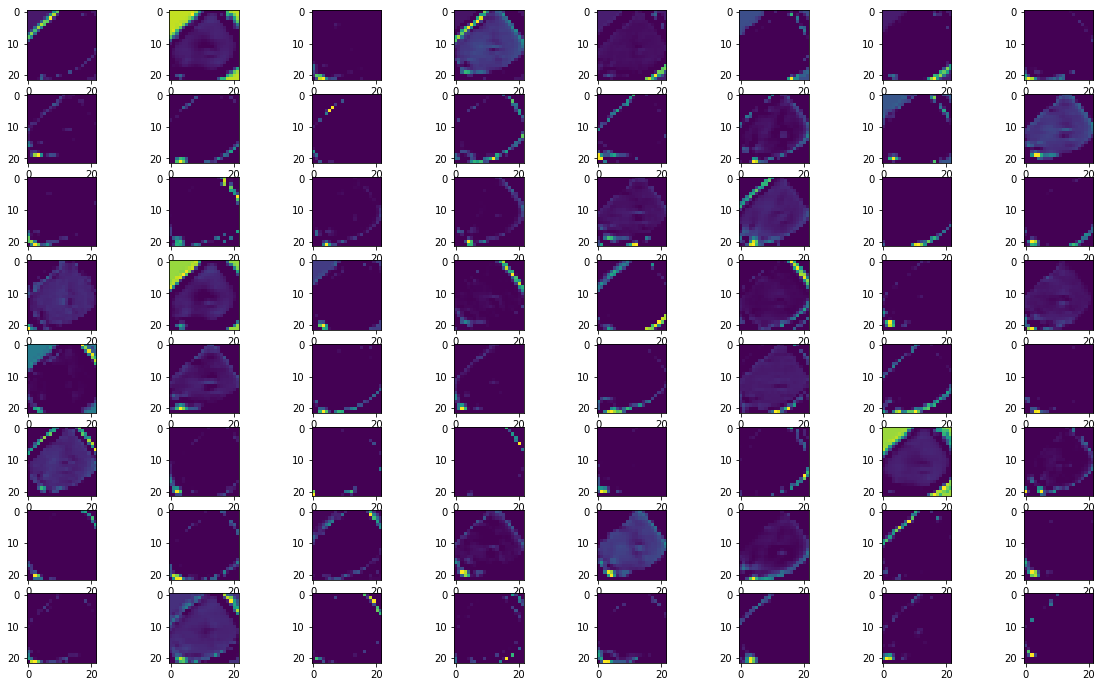

In [43]:
display_activation(activations, 8, 8, 4)

In [ ]:
Output after layer 4

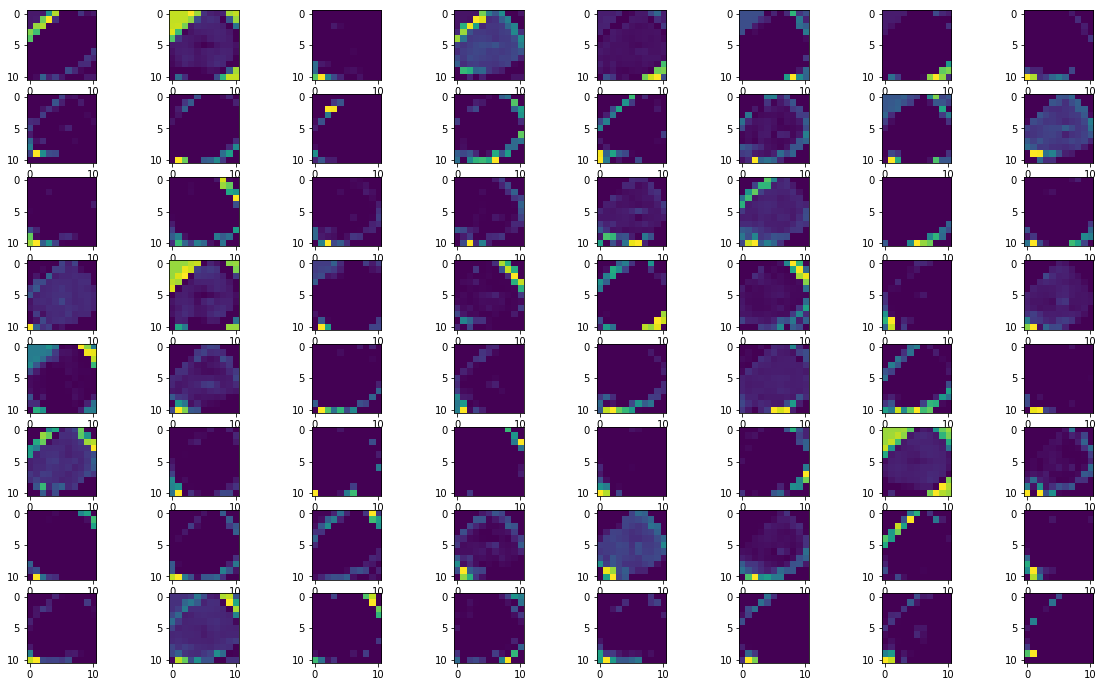

In [44]:
display_activation(activations, 8, 8, 5)

In [ ]:
Output after layer 5

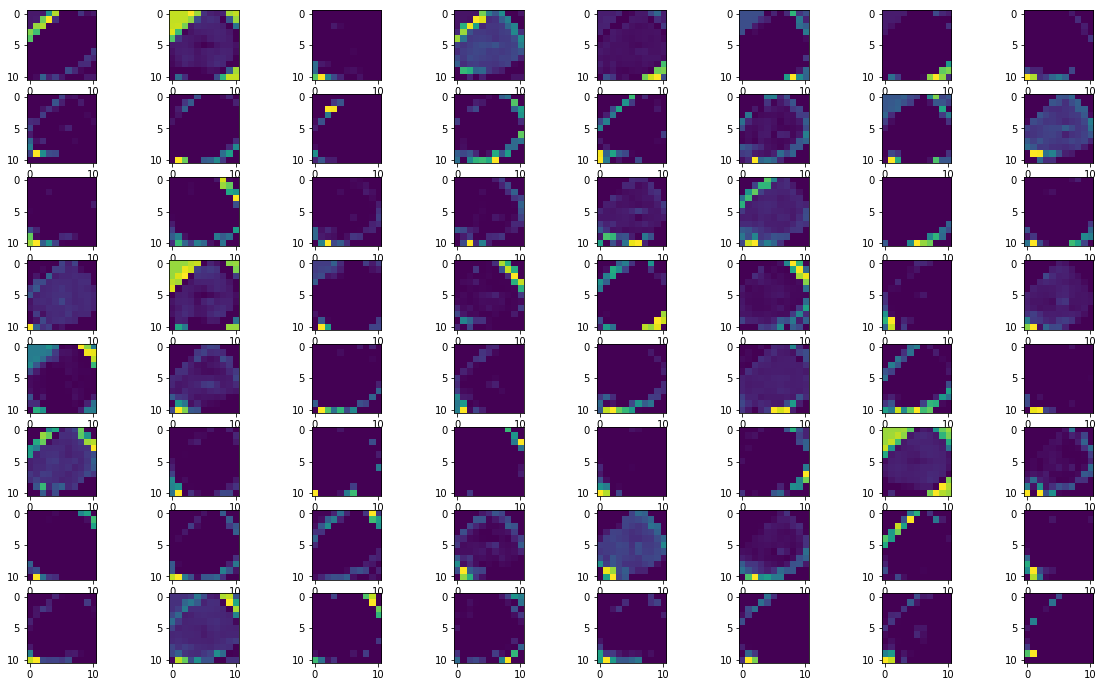

In [45]:
display_activation(activations, 8, 8, 6)

In [ ]:
Output after layer 6

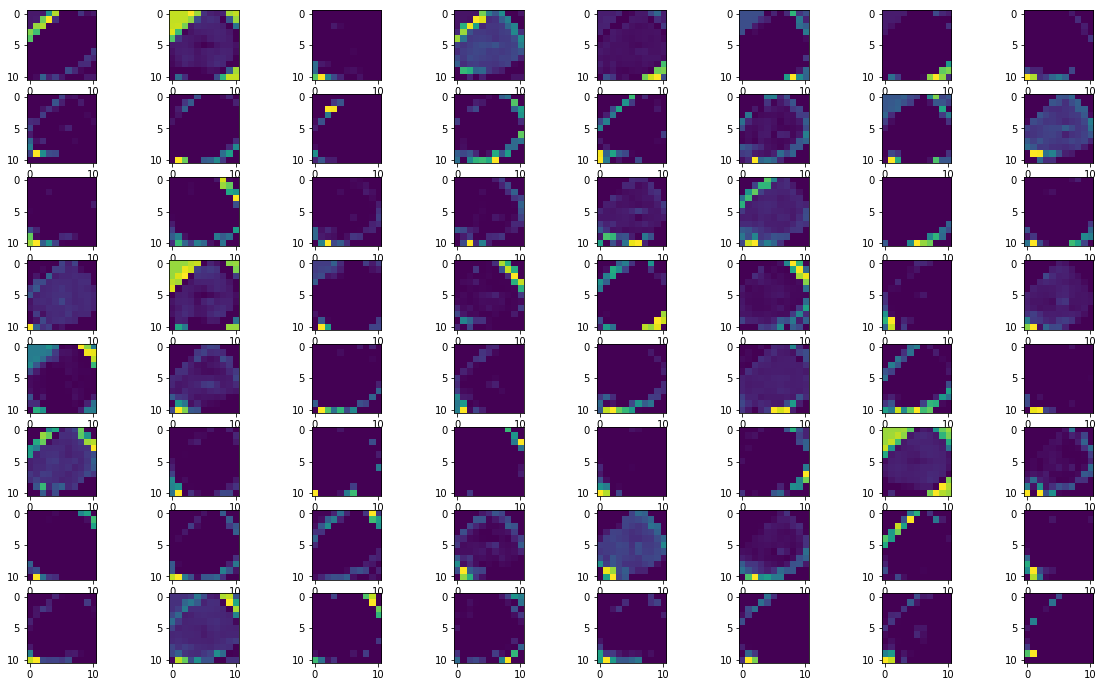

In [46]:
display_activation(activations, 8, 8, 7)

In [ ]:
Output after layer 7

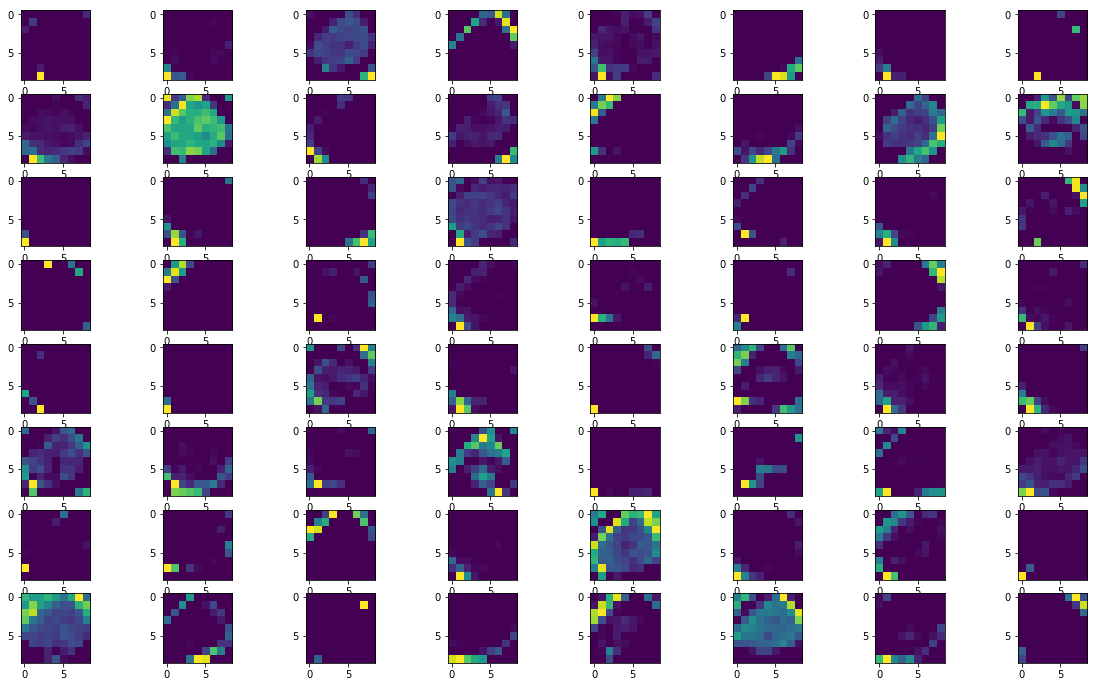

In [47]:
display_activation(activations, 8, 8, 8)

In [ ]:
Output after layer 7

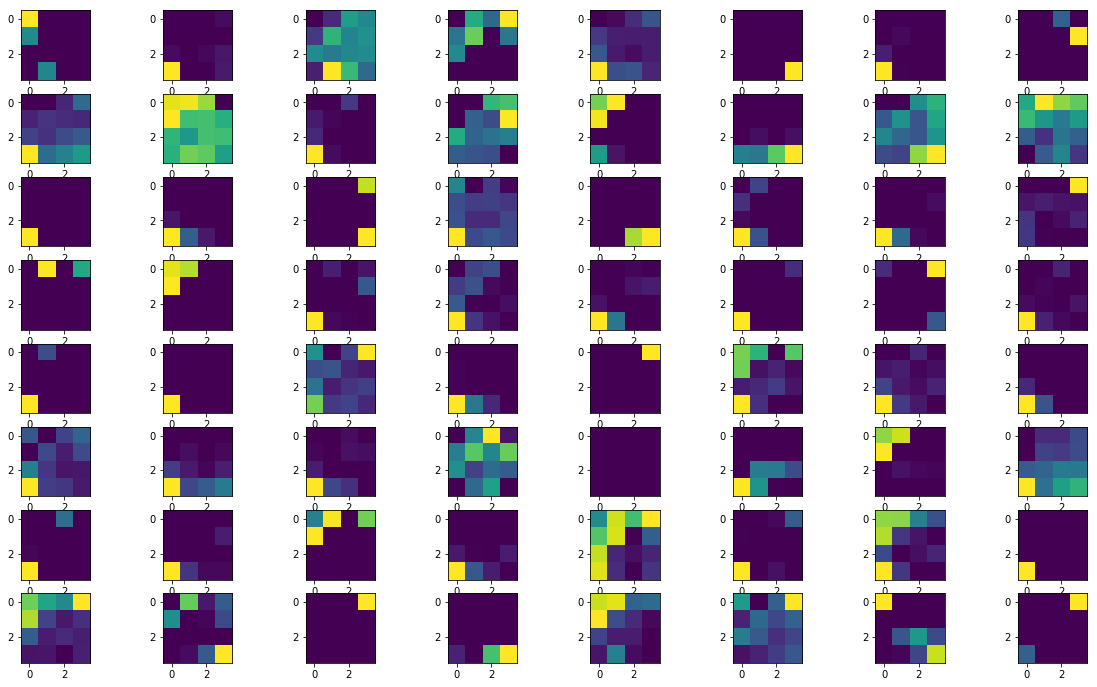

In [48]:
display_activation(activations, 8, 8, 9)

In [ ]:
Output after layer 8

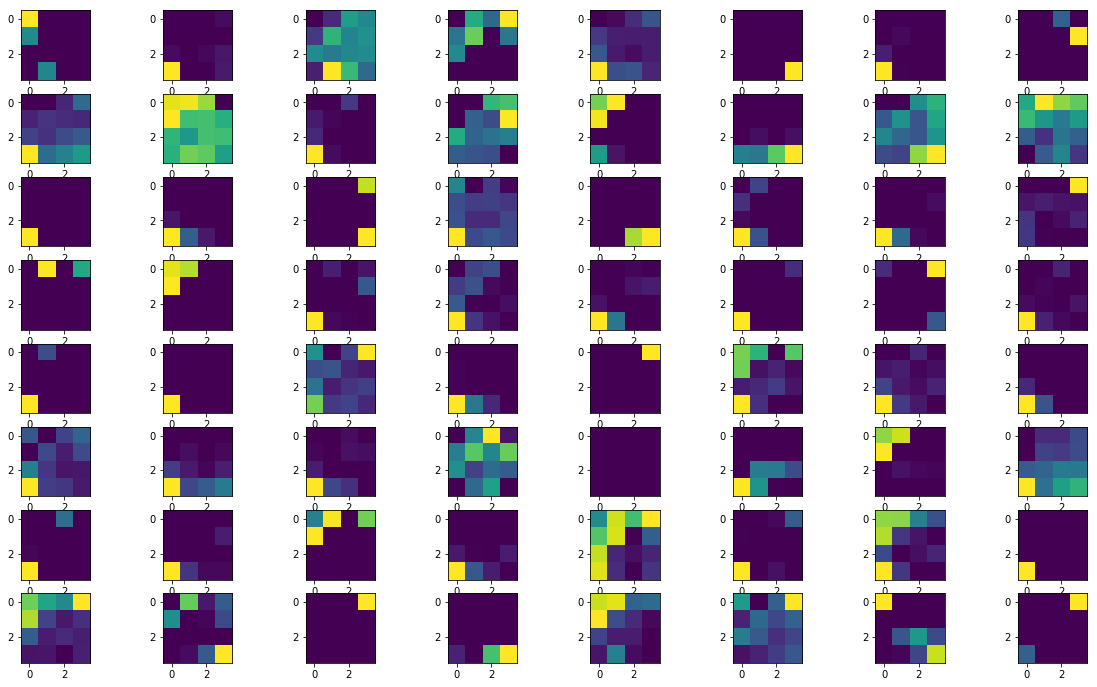

In [49]:
display_activation(activations, 8, 8, 10)

In [ ]:
Output after layer 9

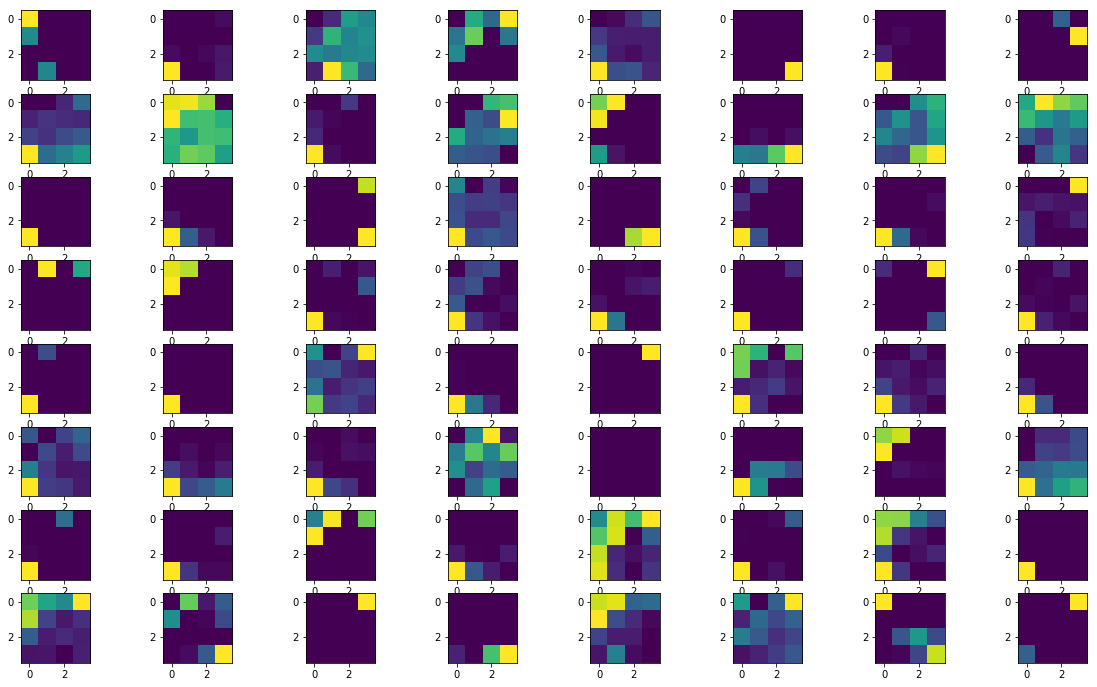

In [50]:
display_activation(activations, 8, 8, 11)

In [ ]:
Output after layer 10